In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk

## EDA

In [2]:
videos = pd.read_csv("youtube data/USvideos.csv")
videos['category_id'] = pd.to_numeric(videos['category_id'])
videos['views'] = pd.to_numeric(videos['views'])
videos['tags'] = videos['tags'].str.split('|')
videos['like_dislike_ratio'] = videos['likes']/videos['dislikes']
videos['like_views_ratio'] = videos['likes']/videos['views']
videos['publish_time'] = pd.to_datetime(videos['publish_time'])

In [75]:
# Fix trending_date

''' ==================================================IGNORE=====================================================
videos['trending_date_split'] = videos['trending_date'].str.split('.')

for i in range(len(videos['trending_date_split'])):
    month = pd.to_numeric(videos['trending_date_split'][i][1])
    while month > 12:
        month -= 12
    if month >= 10:
        videos['trending_date_split'][i][1] = str(month)
    else:
        videos['trending_date_split'][i][1] = '0' + str(month)

videos['trending_date'] = pd.to_datetime(videos['trending_date_split'].str.join('.'), format='%y.%d.%m', utc=True)
'''

In [3]:
videos['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m', utc=True)
videos['time_till_trending'] = videos['trending_date'] - videos['publish_time']

# Align datetime object format for tableau analysis
videos['publish_time'] = videos['publish_time'].dt.strftime('%Y-%m-%dT%H:%M:%S')
videos['trending_date'] = videos['trending_date'].dt.strftime('%Y-%m-%dT%H:%M:%S')

In [4]:
videos['hours_till_trending'] = videos['time_till_trending'].map(lambda x: x.total_seconds()) / 3600
videos['days_till_trending'] = videos['time_till_trending'].map(lambda x: x.total_seconds()) / (3600*24)

In [6]:
videos[['trending_date','publish_time','time_till_trending','days_till_trending']]

,trending_date,publish_time,time_till_trending,days_till_trending
0,2017-11-14T00:00:00,2017-11-13T17:13:01,0 days 06:46:59,0.282627
1,2017-11-14T00:00:00,2017-11-13T07:30:00,0 days 16:30:00,0.687500
2,2017-11-14T00:00:00,2017-11-12T19:05:24,1 days 04:54:36,1.204583
3,2017-11-14T00:00:00,2017-11-13T11:00:04,0 days 12:59:56,0.541620
4,2017-11-14T00:00:00,2017-11-12T18:01:41,1 days 05:58:19,1.248831
...,...,...,...,...
40944,2018-06-14T00:00:00,2018-05-18T13:00:04,26 days 10:59:56,26.458287
40945,2018-06-14T00:00:00,2018-05-18T01:00:06,26 days 22:59:54,26.958264
40946,2018-06-14T00:00:00,2018-05-18T17:34:22,26 days 06:25:38,26.267801
40947,2018-06-14T00:00:00,2018-05-17T17:00:04,27 days 06:59:56,27.291620


In [7]:
videos.to_csv('youtube data/US_videos.csv')

In [8]:
category = pd.read_json("youtube data/US_category_id.json")
category = pd.json_normalize(category['items'])

In [9]:
category['id'] = pd.to_numeric(category['id'])
#category.to_csv('youtube data/US_videos_category.csv')
videos = videos.merge(category,how='inner',left_on='category_id', right_on='id')

In [10]:
videos.dropna()
#videos.to_csv('youtube data/US_videos_complete.csv')
videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                40949 non-null  object         
 1   trending_date           40949 non-null  object         
 2   title                   40949 non-null  object         
 3   channel_title           40949 non-null  object         
 4   category_id             40949 non-null  int64          
 5   publish_time            40949 non-null  object         
 6   tags                    40949 non-null  object         
 7   views                   40949 non-null  int64          
 8   likes                   40949 non-null  int64          
 9   dislikes                40949 non-null  int64          
 10  comment_count           40949 non-null  int64          
 11  thumbnail_link          40949 non-null  object         
 12  comments_disabled       40949 no

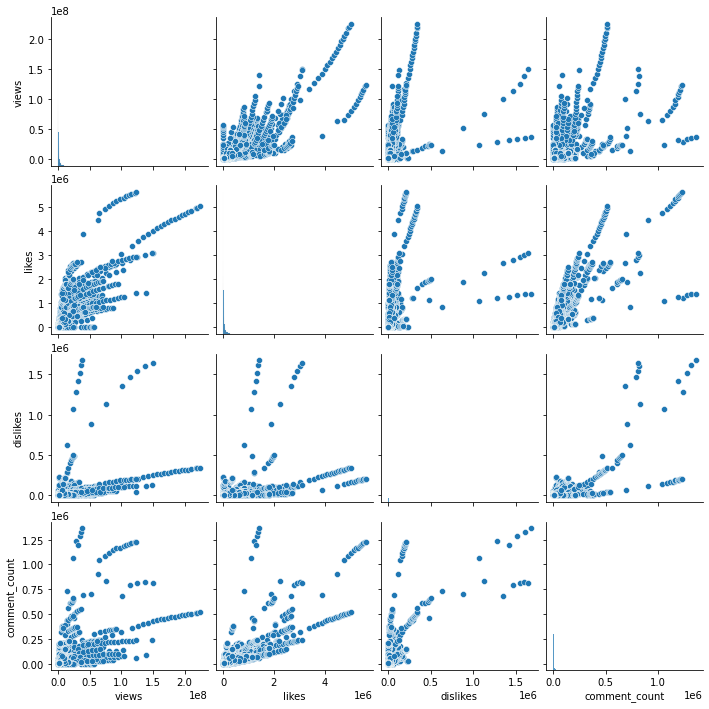

In [63]:
# Find relationships among numeric varaibles and potentially linear relationships between likes and dislikes
# Multiple linear lines in one pairplot suggests that there might exist linear relationships between 
# views, likes, dislikes, and # of comments but these relationship might be different within each video category or
# are dominated by video content 
sns.pairplot(videos,vars=videos.columns[7:11])

In [64]:
videos.sort_values(by=['likes'], ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,like_views_ratio,time_till_trending,hours_till_trending,days_till_trending,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
31839,7C2z4GqqS5E,2018-06-01T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",123010920,5613827,206892,...,0.045637,13 days 14:59:58,326.999444,13.624977,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31796,7C2z4GqqS5E,2018-05-31T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",121219886,5595203,205565,...,0.046157,12 days 14:59:58,302.999444,12.624977,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31754,7C2z4GqqS5E,2018-05-30T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",115664850,5530568,200995,...,0.047815,11 days 14:59:58,278.999444,11.624977,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31709,7C2z4GqqS5E,2018-05-29T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",111882133,5486349,197638,...,0.049037,10 days 14:59:58,254.999444,10.624977,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31669,7C2z4GqqS5E,2018-05-28T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",107756615,5439015,194172,...,0.050475,9 days 14:59:58,230.999444,9.624977,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True


In [65]:
videos.sort_values(by=['views'],ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,like_views_ratio,time_till_trending,hours_till_trending,days_till_trending,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
31902,VYOjWnS4cMY,2018-06-02T00:00:00,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07,"[Childish Gambino, ""Rap"", ""This Is America"", ""...",225211923,5023450,343541,...,0.022305,26 days 19:59:53,643.998056,26.833252,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31856,VYOjWnS4cMY,2018-06-01T00:00:00,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07,"[Childish Gambino, ""Rap"", ""This Is America"", ""...",220490543,4962403,338105,...,0.022506,25 days 19:59:53,619.998056,25.833252,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31813,VYOjWnS4cMY,2018-05-31T00:00:00,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07,"[Childish Gambino, ""Rap"", ""This Is America"", ""...",217750076,4934188,335462,...,0.022660,24 days 19:59:53,595.998056,24.833252,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31770,VYOjWnS4cMY,2018-05-30T00:00:00,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07,"[Childish Gambino, ""Rap"", ""This Is America"", ""...",210338856,4836448,326902,...,0.022994,23 days 19:59:53,571.998056,23.833252,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31725,VYOjWnS4cMY,2018-05-29T00:00:00,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07,"[Childish Gambino, ""Rap"", ""This Is America"", ""...",205643016,4776680,321493,...,0.023228,22 days 19:59:53,547.998056,22.833252,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True


In [13]:
videos.groupby('snippet.title')['views'].mean().sort_values(ascending=False).head()

snippet.title
Music                    6.201003e+06
Film & Animation         3.106250e+06
Nonprofits & Activism    2.963884e+06
Gaming                   2.620831e+06
Entertainment            2.067883e+06
Name: views, dtype: float64

In [14]:
videos[videos['snippet.title']=='People & Blogs']['like_views_ratio'].describe()

count    3210.000000
mean        0.041805
std         0.030226
min         0.000000
25%         0.019998
50%         0.035524
75%         0.055544
max         0.228182
Name: like_views_ratio, dtype: float64

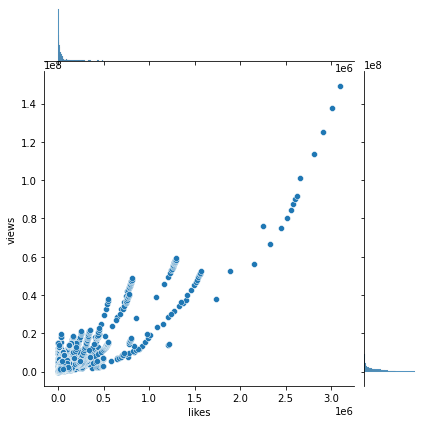

In [15]:
sns.jointplot(x='likes',y='views',data=videos[videos['snippet.title']=='Entertainment'])

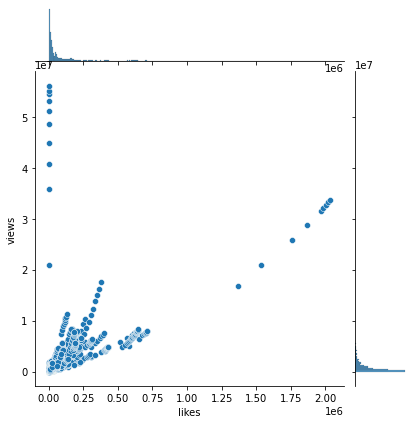

In [16]:
sns.jointplot(x='likes',y='views',data=videos[videos['snippet.title']=='People & Blogs'])

In [40]:
# sns.lmplot(x='likes',y='views',data=df)
videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                40949 non-null  object         
 1   trending_date           40949 non-null  object         
 2   title                   40949 non-null  object         
 3   channel_title           40949 non-null  object         
 4   category_id             40949 non-null  int64          
 5   publish_time            40949 non-null  object         
 6   tags                    40949 non-null  object         
 7   views                   40949 non-null  int64          
 8   likes                   40949 non-null  int64          
 9   dislikes                40949 non-null  int64          
 10  comment_count           40949 non-null  int64          
 11  thumbnail_link          40949 non-null  object         
 12  comments_disabled       40949 no

## Linear Regression to Predict Views

In [41]:
# For music category
df = videos[videos['snippet.title']=='Music']

In [47]:
from sklearn.model_selection import train_test_split
y = df['views']
X = df[['likes','dislikes','comment_count','days_till_trending']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.coef_, lm.intercept_

(array([ 23.04609767, 382.49387576, -93.41828938, 761.46356362]),
 -125534.33542959858)

Text(0, 0.5, 'Predicted Y')

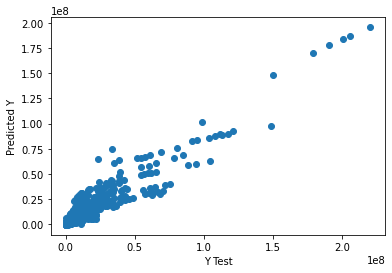

In [48]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## 10-fold Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lm,X,y,cv=10)

In [50]:
score

array([ 0.93186145,  0.83191098, -0.14925282,  0.27477902,  0.87093301,
        0.77304529,  0.79224127,  0.8548741 ,  0.9090441 ,  0.86895047])

In [51]:
score.mean()

0.6958386866717803

## When to post Ads

In [96]:
popular = videos[(videos['snippet.title']=='Music') & (videos['views']>=1000000)]

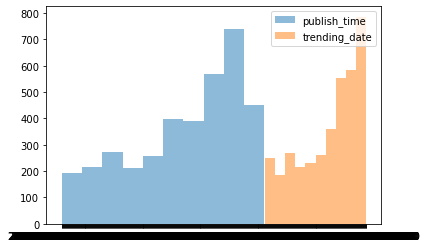

In [97]:
plt.hist(popular['publish_time'], alpha=0.5, label='publish_time')
plt.hist(popular['trending_date'], alpha=0.5, label='trending_date')
plt.legend(loc='upper right')

<AxesSubplot:>

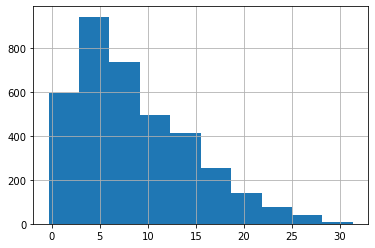

In [98]:
popular['days_till_trending'].hist()

In [75]:
popular['days_till_trending'].mean()

8.604484225035394

In [77]:
popular['days_till_trending'].median()

7.0948726851851855

In [99]:
popular['days_till_trending'].mode()

0    1.791655
1    2.791655
2    3.791655
3    5.791655
4    6.791655
Name: days_till_trending, dtype: float64

People & Blogs         6.040659722222222
Entertainment          6.124994212962963
Comedy                 5.4067592592592595
Science & Technology   6.1569212962962965
Film & Animation       6.199224537037037
News & Politics        6.499178240740741
Sports                 5.354155092592593
Music                  7.0948726851851855
Pets & Animals         8.435381944444444
Education              7.366278935185186
Howto & Style          6.4103819444444445
Autos & Vehicles       5.292696759259259
Travel & Events        6.994872685185185
Gaming                 6.288530092592593
Nonprofits & Activism  4.229155092592593
Shows                  12.12486111111111


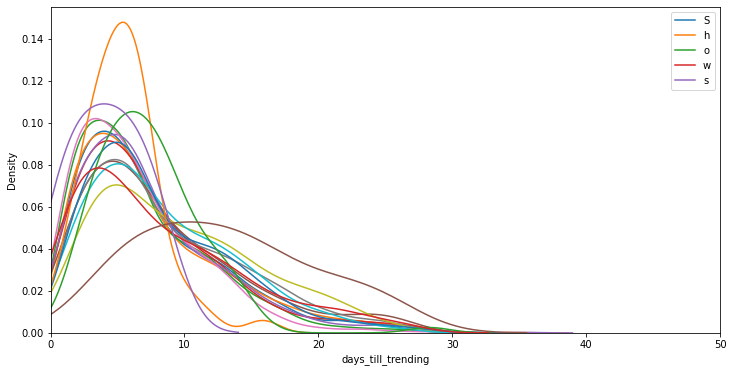

In [102]:
fig, ax = plt.subplots(figsize=(12, 6))
for category in videos['snippet.title'].unique():
    popular = videos[(videos['snippet.title']==category) & (videos['views']>=1000000)]
    sns.kdeplot(popular['days_till_trending'])
    print(category.ljust(22," "), popular['days_till_trending'].median())
    
plt.xlim([0, 50])
plt.legend(labels=category,loc='upper right')

In [80]:
videos['snippet.title'].unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)